In [77]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline


### Step 1: Importing and inspecting the data

In [219]:
# Importing the csv table
leads = pd.read_csv(r"D:\Vikas Upgrad\Course 2\Group case study assignment\Lead Scoring Assignment\Leads.csv")

In [5]:
# # Let's see the head of our master dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Let's check the dimensions of the dataframe
leads.shape


(9240, 37)

In [8]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [220]:
# One thing we can clearly observe that there are  select values for many column. I honestly observed these after 
# analysing single columns and then coming back here to replace them at first instances
# These select are most probabaly the cases where nothing been selected and can be considered as null values
# Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [80]:
# Let's see the type of each column
leads.info()

# Clearly there are null values which need to be removed or cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Cleaning the data

In [5]:
# # Checking the percentage of null values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### We will analyse the null columns individually to decide about the values.

In [221]:
# We can remove the columns having more than 60% null because to fill that values will not have correct represenation anyway.

leads = leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)), 2)>60)].columns, 1)

##### Lead Quality

In [7]:
leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

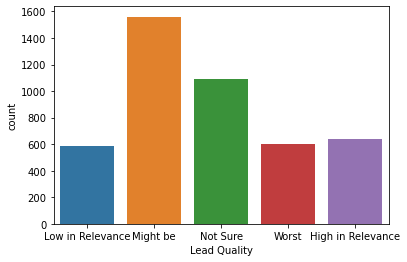

In [55]:
sns.countplot(leads['Lead Quality'])

In [222]:
# As Lead quality is based on the employee perspctive, so if left blank we can impute 'Not Sure' in NaN safely.
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Not Sure')

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

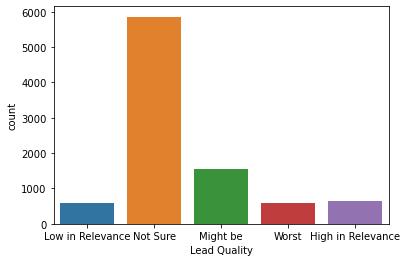

In [83]:
sns.countplot(leads['Lead Quality'])
leads['Lead Quality'].describe()

##### Asymmetrique columns 

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='count'>

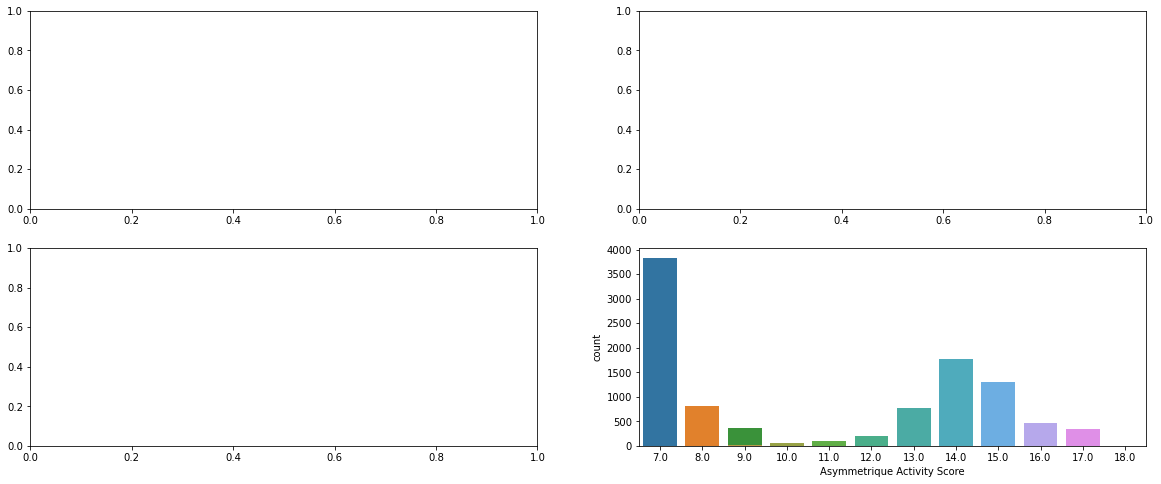

In [84]:
fig, axs = plt.subplots(2,2, figsize = (20,8))
sns.countplot(leads['Asymmetrique Activity Index'])
sns.countplot(leads['Asymmetrique Activity Score'])


In [223]:
# 45% null values means we need to drop these columnw because difficult to accomodate other values.
leads = leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

##### Tags

In [62]:
leads['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

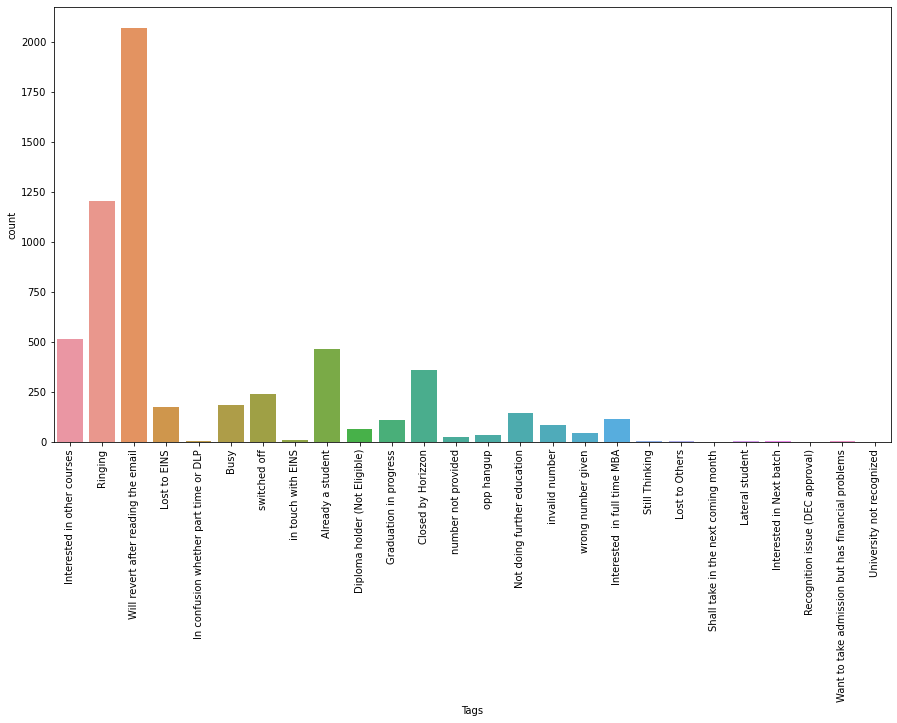

In [63]:
fig, axs = plt.subplots(figsize = (15,8))
sns.countplot(leads['Tags'])
xticks(rotation = 90)

In [224]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Will revert after reading the email')

##### What matters most to you in choosing a course

In [65]:
leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [225]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')


In [67]:
leads['What matters most to you in choosing a course'].describe()

count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

##### What is your current occupation

In [68]:
leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [226]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

##### Country

In [227]:
leads['Country'] = leads['Country'].replace(np.nan, 'India')

##### Specialization

In [72]:
leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

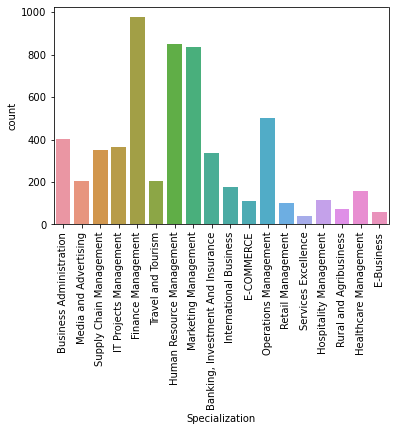

In [73]:
sns.countplot(leads.Specialization)
xticks(rotation = 90)

In [228]:
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Others')

##### City

In [75]:
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

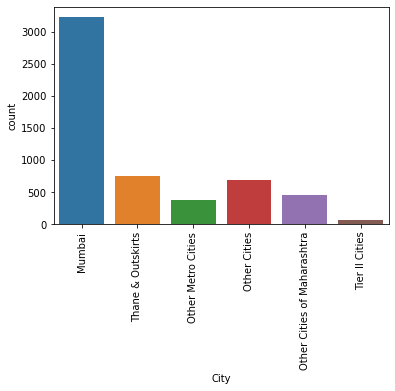

In [76]:
sns.countplot(leads['City'])
xticks(rotation=90)

In [229]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

In [92]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [83]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [230]:
leads['Lead Source']= leads['Lead Source'].replace(np.nan,'Google')

In [20]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [87]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [89]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [231]:
leads['Last Activity']= leads['Last Activity'].replace(np.nan,'Others')

In [232]:
# Rest missing values are under 2% so we can drop these rows.
leads.dropna(inplace = True)

In [98]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [233]:
leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

### Step 2: EDA

In [ ]:
# Converted is the target variable



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

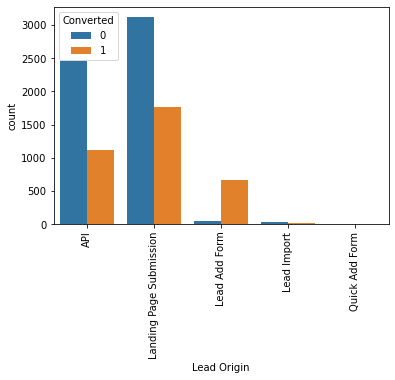

In [26]:
# Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
xticks(rotation = 90)

###### Lead Add Form has the highest conversion rate but count of leads are not much.
###### API and Landing Page Submission have less conversion rate but count of leads are more.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

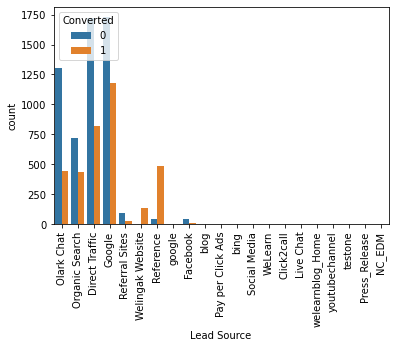

In [27]:
# Lead Source
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
xticks(rotation = 90)

In [234]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

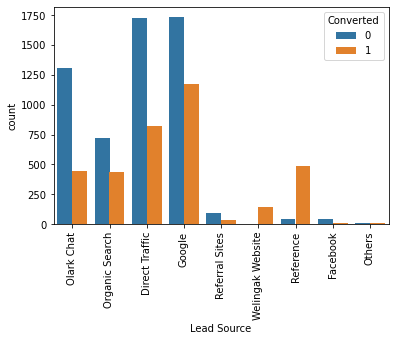

In [29]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
xticks(rotation = 90)

###### Google and Direct traffic generates maximum number of leads.
###### Reference and welingak website leads conversion rate is high.


<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

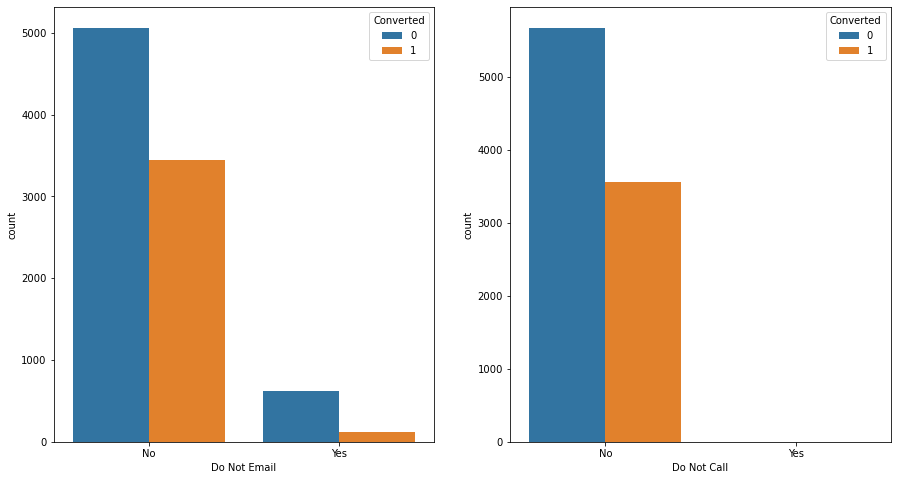

In [30]:
fig, axs = plt.subplots(1,2,figsize = (15,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads, ax = axs[1])

<AxesSubplot:xlabel='TotalVisits'>

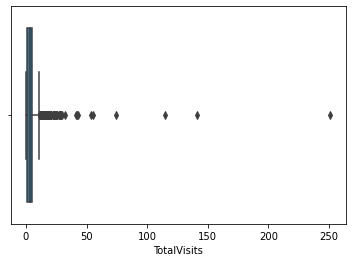

In [235]:
sns.boxplot(leads['TotalVisits'])

In [236]:
# Lots of outliers in the data

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Total Time Spent on Website'>

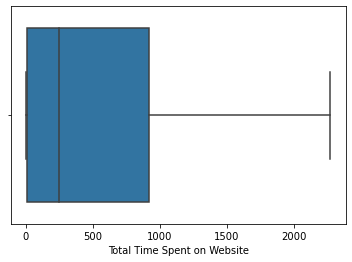

In [237]:
sns.boxplot(leads['Total Time Spent on Website'])

# No outliers

<AxesSubplot:xlabel='Page Views Per Visit'>

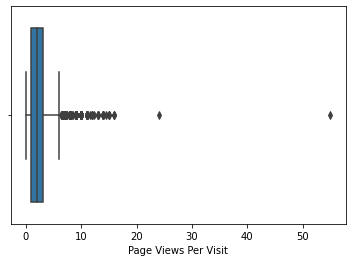

In [238]:
sns.boxplot(leads['Page Views Per Visit'])

# As we can see that there are lot of outliers

In [239]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

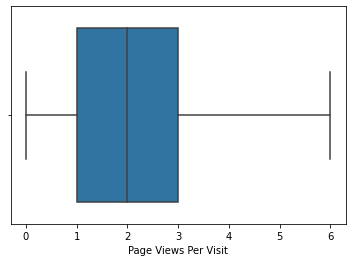

In [240]:
sns.boxplot(leads['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

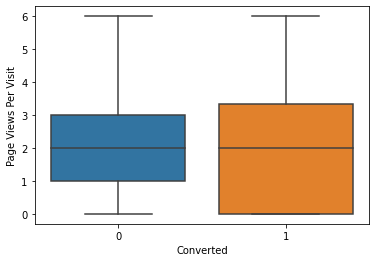

In [36]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

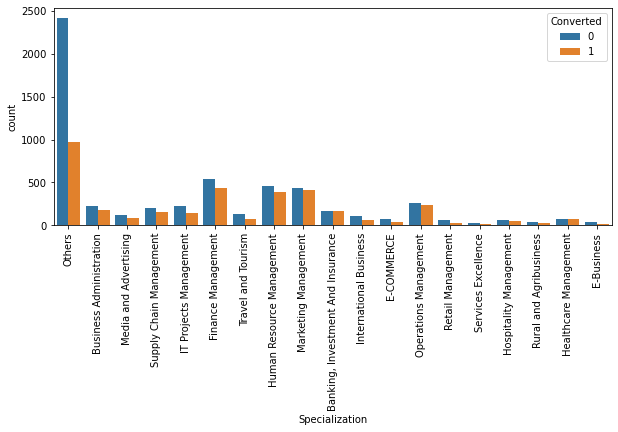

In [43]:
fig, axs = plt.subplots(figsize = (10,4))
sns.countplot(x = "Specialization", hue = "Converted", data = leads)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Approached upfront'),
  Text(13, 0, 'SMS Sent'),
  Text(14, 0, 'Visited Booth in Tradeshow'),
  Text(15, 0, 'Resubscribed to emails'),
  Text(16, 0, 'Email Received'),
  Text(17, 0, 'Email Marked Spam')])

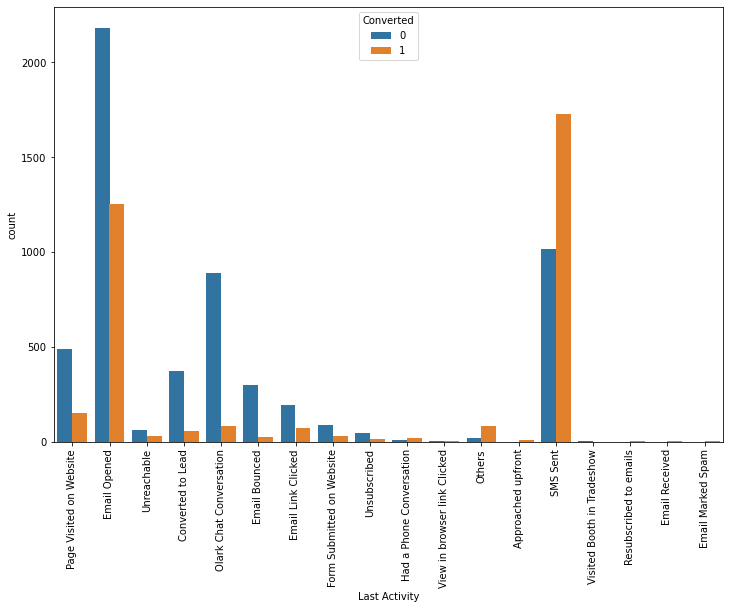

In [40]:
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
xticks(rotation = 90)

In [241]:
# As we can see that few of the activity are insignificant in comparison to others. So we can replace them for easyness
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'],'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'SMS Sent')])

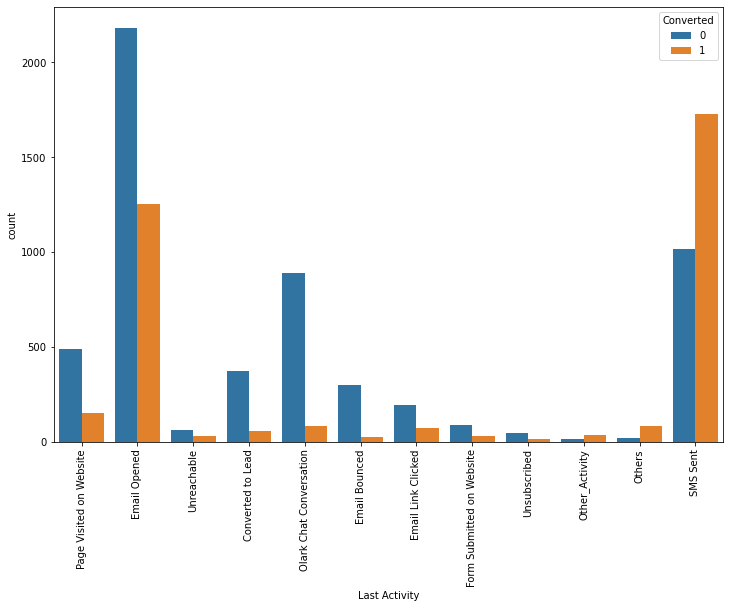

In [42]:
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

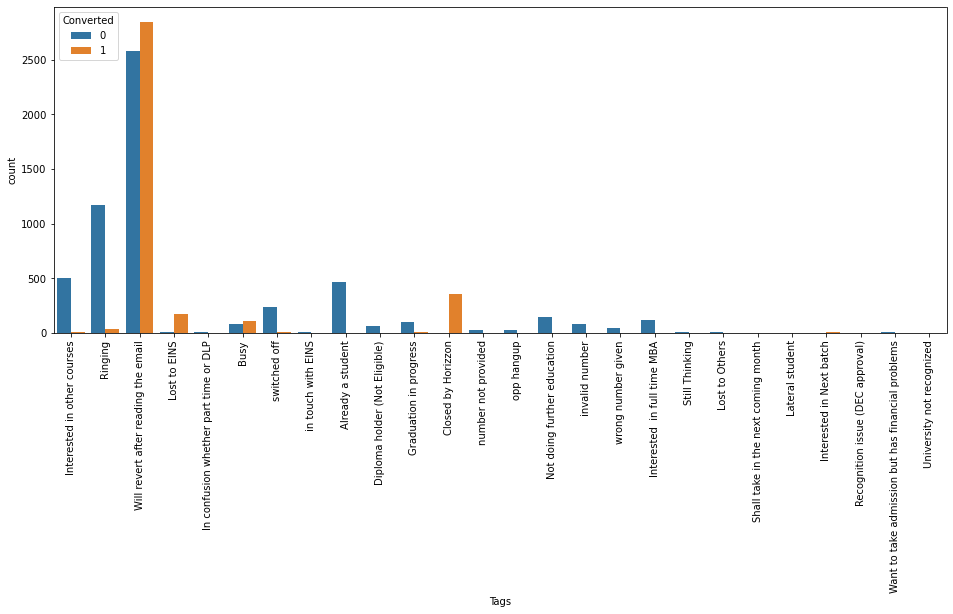

In [44]:
fig, axs = plt.subplots(figsize = (16,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads)
xticks(rotation = 90)

In [242]:
# As we can see that few of the activity are insignificant in comparison to others. So we can replace them for easyness
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Other_Tags'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'Not doing further education'),
  Text(10, 0, 'invalid number'),
  Text(11, 0, 'wrong number given'),
  Text(12, 0, 'Interested  in full time MBA')])

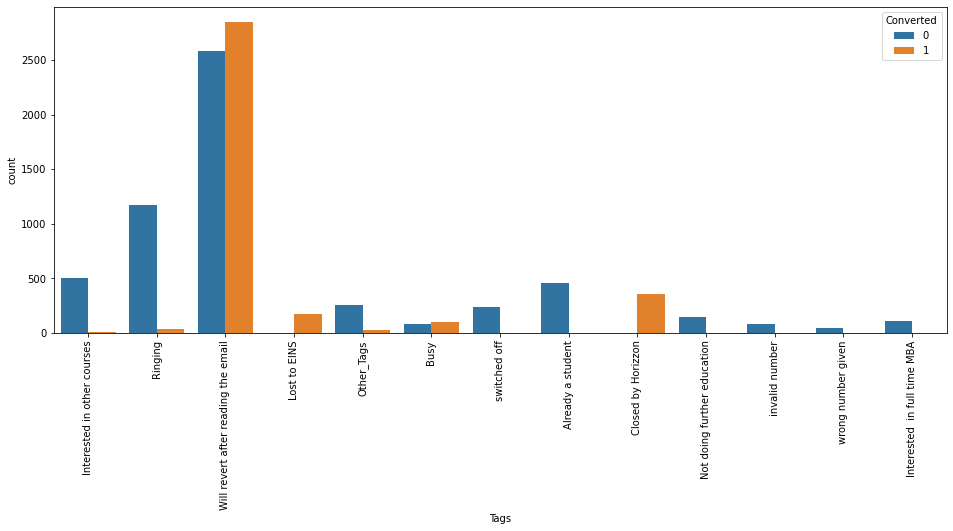

In [46]:
fig, axs = plt.subplots(figsize = (16,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads)
xticks(rotation = 90)

<AxesSubplot:xlabel='Last Notable Activity_View in browser link Clicked', ylabel='count'>

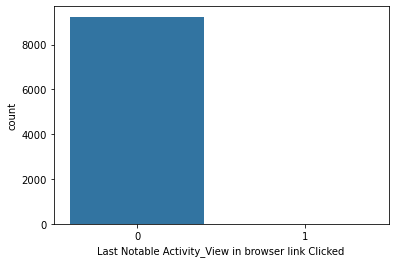

#### As per the above EDA analysis we have observed that many columns are not adding any value to the model and we can drop them for further analysis.


In [243]:
leads = leads.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

### Step 3: Data preparation

#### Converting some binary variables (Yes/No) to 0/1

In [244]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the  list
leads[varlist] = leads[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [245]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

#### Dropping the repeated variables

In [246]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [51]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 4: Test-Train Split

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()               
               
               

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [249]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [250]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [251]:
from sklearn.preprocessing import MinMaxScaler

In [252]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0,0.3,0.570794,0.250000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5520,0,0,0.7,0.026631,1.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.5,0.075011,0.416667,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1566,0,0,1.0,0.550821,0.583333,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
# Checking the Churn Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

### Step 6: Looking at Correlations

In [62]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

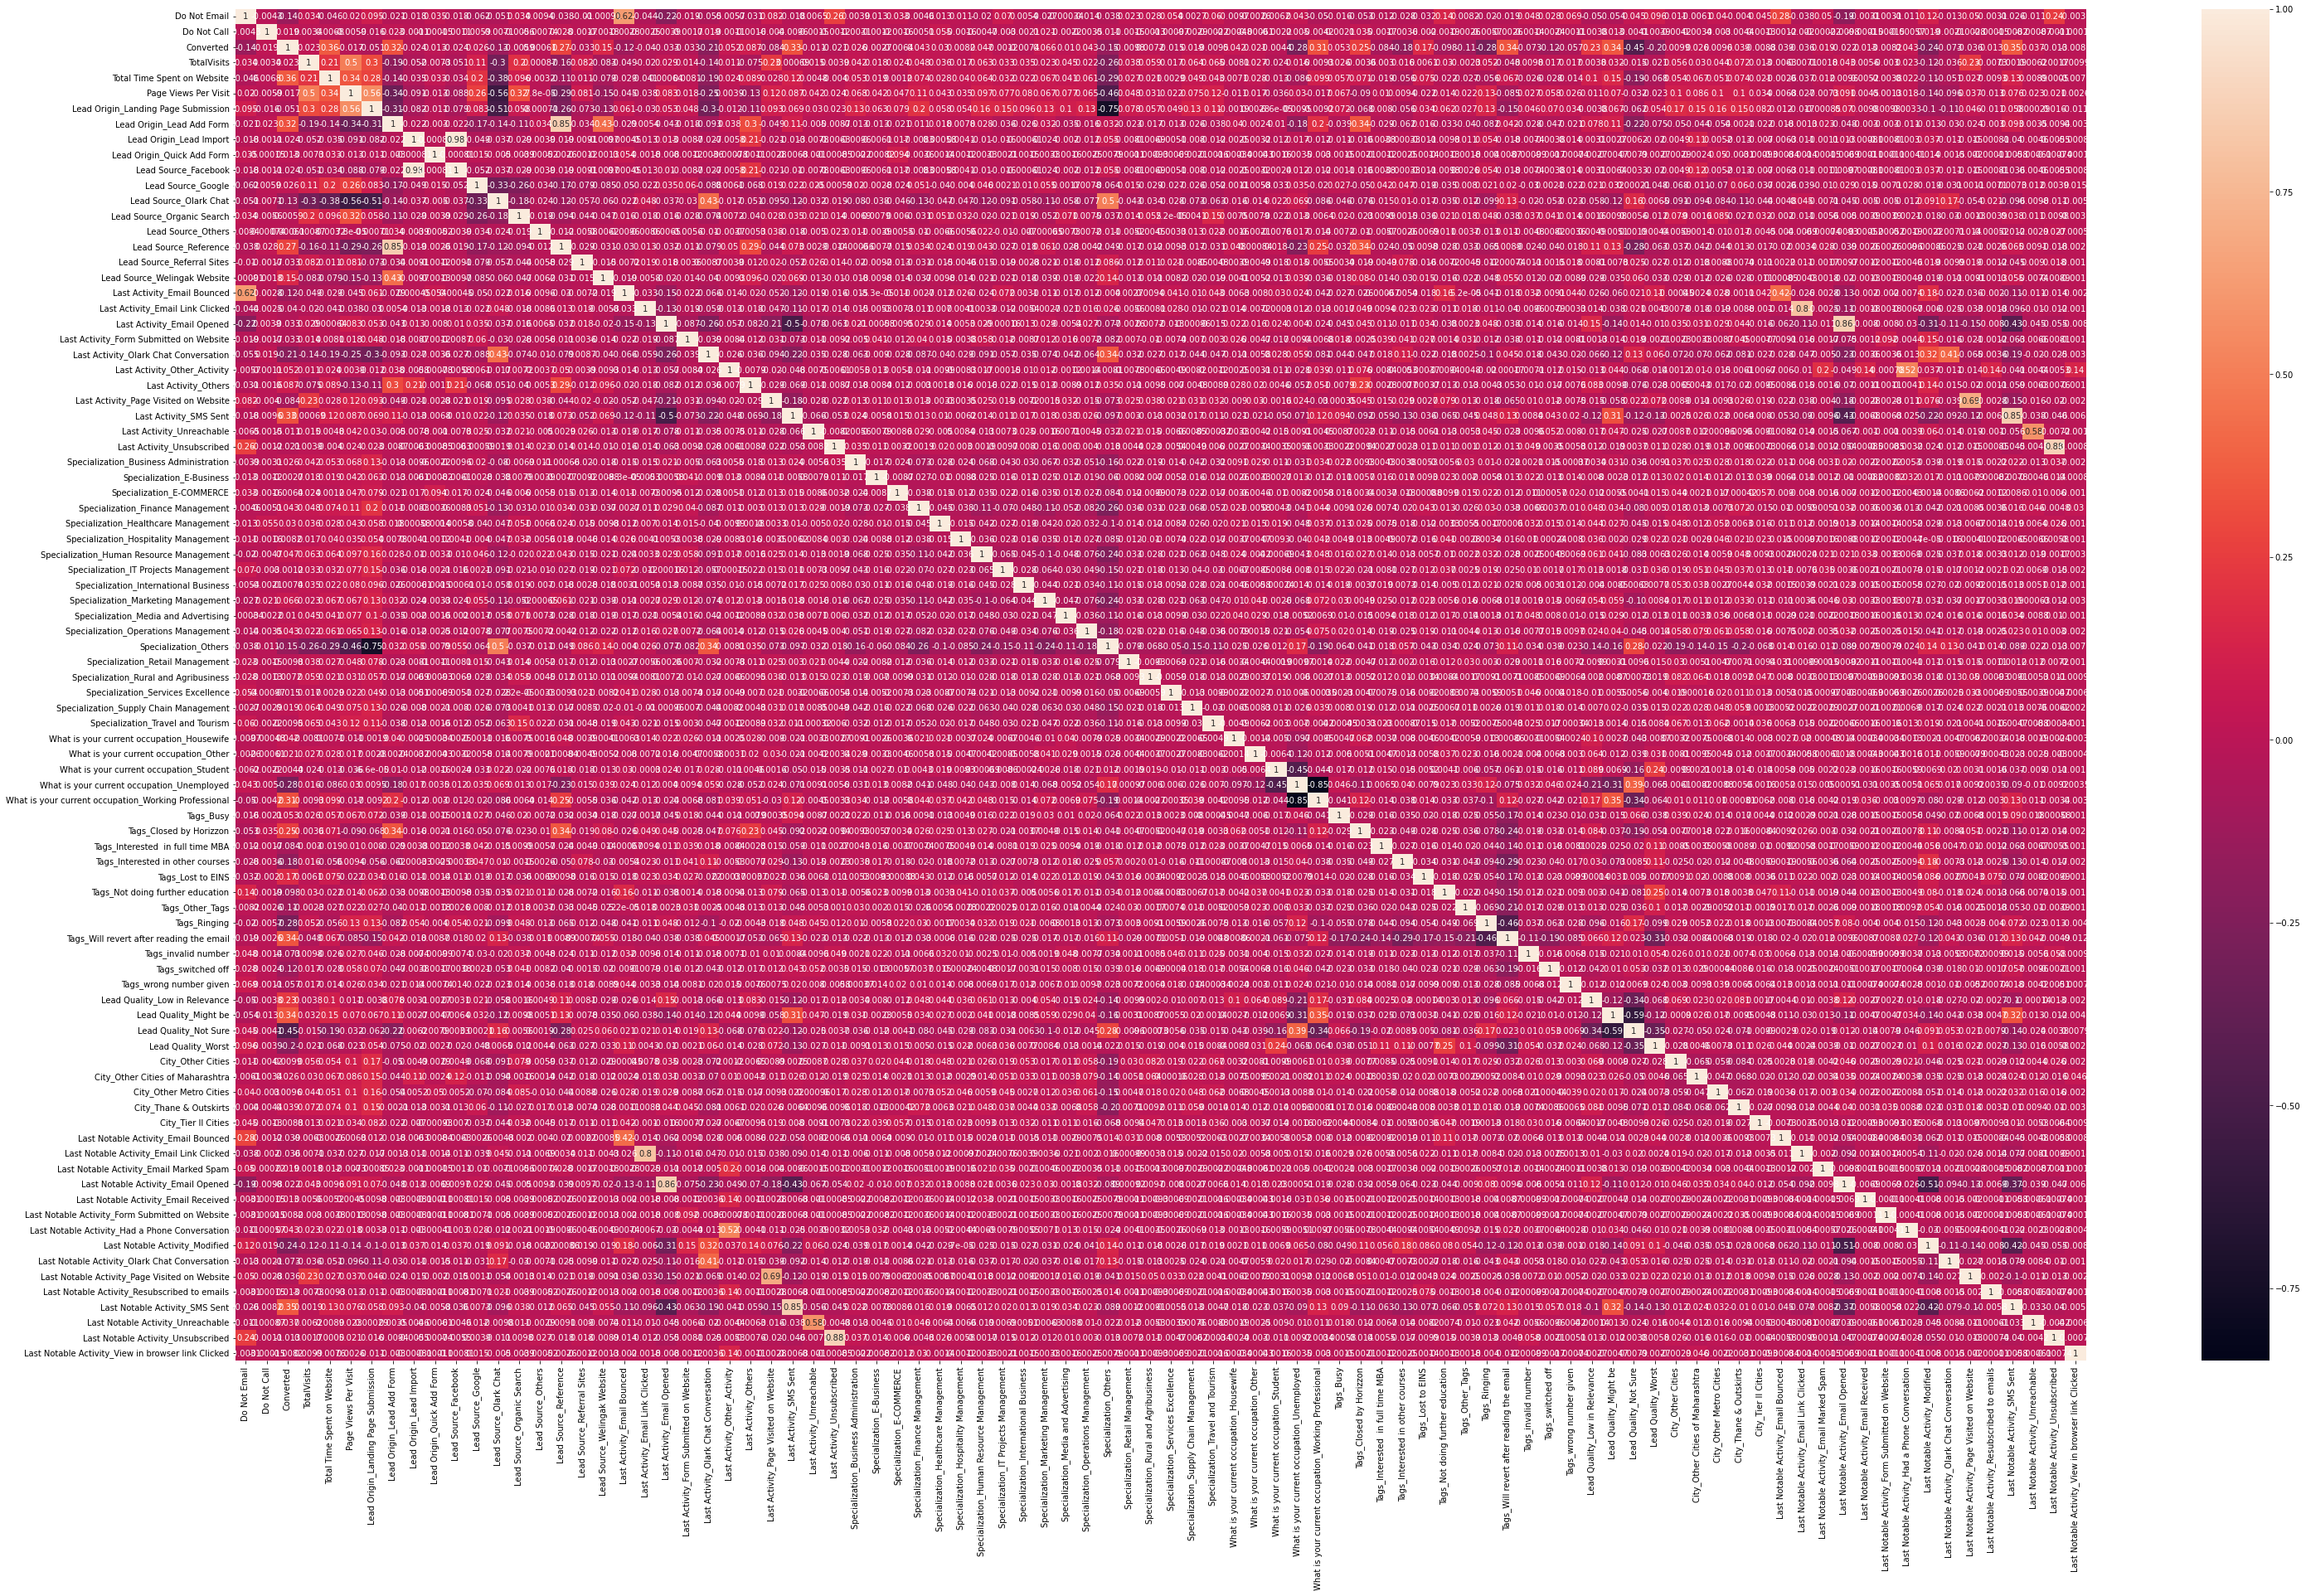

In [64]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,30))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Step 7: Model Building-- Let's start by splitting our data into a training set and a test set.

In [254]:
import statsmodels.api as sm

In [255]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           84
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1308.7
Date:                Tue, 20 Sep 2022   Deviance:                       2617.5
Time:                        08:23:33   Pearson chi2:                 3.37e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6003
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.3658   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Do Not Email                                            -1.1638      0.302     -3.859      0.000      -1.755      -0.573
Do Not Call                                             22.8406    8.3e+04      0.000      1.000   -1.63e+05    1.63e+05
TotalVisits                                              1.0045      0.303      3.320      0.001       0.411       1.598
Total Time Spent on Website                              4.4907      0.253     17.769      0.000       3.995       4.986
Page Views Per Visit                                    -1.1176      0.320     -3.496      0.000      -1.744      -0.491
Lead Origin_Landing Page Submission                     -0.5195      0.215     -2.411      0.016      -0.942      -0.097
Lead Origin_Lead Add Form                                2.5646      0.886      2.893      0.004       0.827       4.302
Lead Origin_Lead Import                                  4.7255      1.582      2.986      0.003       1.624       7.827
Lead Source_Facebook                                    -3.4788      1.590     -2.188      0.029      -6.595      -0.363
Lead Source_Google                                       0.0961      0.152      0.633      0.527      -0.201       0.394
Lead Source_Olark Chat                                   0.8115      0.228      3.561      0.000       0.365       1.258
Lead Source_Organic Search                               0.2635      0.200      1.318      0.188      -0.128       0.655
Lead Source_Others                                      -0.1601      0.905     -0.177      0.860      -1.933       1.613
Lead Source_Reference                                   -0.9941      0.971     -1.024      0.306      -2.897       0.909
Lead Source_Referral Sites                              -0.3694      0.494     -0.747      0.455      -1.338       0.600
Lead Source_Welingak Website                             2.4526      1.145      2.142      0.032       0.209       4.696
Last Activity_Email Bounced                             -0.5507      0.729     -0.755      0.450      -1.980       0.878
Last Activity_Email Link Clicked                         0.9723      0.614      1.584      0.113      -0.231       2.176
Last Activity_Email Opened                               0.3314      0.392      0.845      0.398      -0.437       1.100
Last Activity_Form Submitted on Website                  0.2930      0.561      0.522      0.602      -0.807       1.393
Last Activity_Olark Chat Conversation                   -0.4263      0.395     -1.081      0.280      -1.200       0.347
Last Activity_Other_Activity                             0

### Step 8: Feature Selection Using RFE

In [121]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Last Notable Activity_View in browser link Clicked'], axis = 1)

In [256]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [257]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)
rfe= rfe.fit(X_train, y_train)

In [258]:
rfe.support_

array([ True, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False])

In [259]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 28),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 57),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', False, 39),
 ('Last Activity_Form Submitted on Website', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 7),
 ('Last Activity_Other_Activity', False, 21),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Last Activity_SMS Sent', Tru

In [260]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [142]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
     

##### Assessing the model with StatsModels

In [261]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1373.3
Date:                Tue, 20 Sep 2022   Deviance:                       2746.6
Time:                        08:25:45   Pearson chi2:                 2.04e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9751      0.254     -7.785      0.000      -2.472      -1.478
Do Not Email                                            -1.0938      0.227     -4.813      0.000      -1.539      -0.648
Total Time Spent on Website                              4.2221      0.229     18.472      0.000       3.774       4.670
Page Views Per Visit                                    -1.2364      0.191     -6.460      0.000      -1.612      -0.861
Lead Origin_Lead Add Form                                1.5964      0.372      4.294      0.000       0.868       2.325
Lead Source_Welingak Website                             2.9871      0.816      3.660      0.000       1.388       4.587
Last Activity_SMS Sent                                   1.1611      0.206      5.628      0.000       0.757       1.566
What is your current occupation_Working Professional     1.2252      0.303      4.038      0.000       0.631       1.820
Tags_Busy                                                3.3631      0.333     10.086      0.000       2.710       4.017
Tags_Closed by Horizzon                                  8.3063      0.798     10.403      0.000       6.741       9.871
Tags_Lost to EINS                                        9.1680      0.771     11.885      0.000       7.656      10.680
Tags_Ringing                                            -1.5559      0.342     -4.546      0.000      -2.227      -0.885
Tags_Will revert after reading the email                 3.5944      0.242     14.851      0.000       3.120       4.069
Tags_invalid number                                     -1.6603      1.333     -1.245      0.213      -4.273       0.952
Tags_switched off                                       -2.3402      0.688     -3.404      0.001      -3.688      -0.993
Tags_wrong number given                                -22.2085    1.8e+04     -0.001      0.999   -3.53e+04    3.52e+04
Lead Quality_Not Sure                                   -3.0999      0.140    -22.215      0.000      -3.373      -2.826
Lead Quality_Worst                                      -3.3985      0.716     -4.749      0.000      -4.801      -1.996
Last Notable Activity_Modified                          -1.2747      0.137     -9.305      0.000      -1.543      -1.006
Last Notable Activity_Olark Chat Conversation           -1.4516      0.376     -3.857      0.000      -2.189      -0.714
Last Notable Activity_SMS Sent                           0.8963      0.242      3.704      0.000       0.422       1.371
========================================================================================================================
"""

In [262]:
# As we can see that p value for Tags_wrong number given number is greater than 0.05 we can drop the column.

col1 = col.drop('Tags_wrong number given',1)

In [263]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1376.3
Date:                Tue, 20 Sep 2022   Deviance:                       2752.7
Time:                        08:28:56   Pearson chi2:                 2.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0814      0.253     -8.216      0.000      -2.578      -1.585
Do Not Email                                            -1.0888      0.227     -4.802      0.000      -1.533      -0.644
Total Time Spent on Website                              4.2054      0.228     18.448      0.000       3.759       4.652
Page Views Per Visit                                    -1.2258      0.191     -6.415      0.000      -1.600      -0.851
Lead Origin_Lead Add Form                                1.6154      0.373      4.332      0.000       0.884       2.346
Lead Source_Welingak Website                             2.9673      0.816      3.634      0.000       1.367       4.568
Last Activity_SMS Sent                                   1.1608      0.206      5.623      0.000       0.756       1.565
What is your current occupation_Working Professional     1.2458      0.305      4.085      0.000       0.648       1.844
Tags_Busy                                                3.4716      0.332     10.447      0.000       2.820       4.123
Tags_Closed by Horizzon                                  8.4005      0.798     10.522      0.000       6.836       9.965
Tags_Lost to EINS                                        9.2613      0.772     12.004      0.000       7.749      10.774
Tags_Ringing                                            -1.4418      0.341     -4.234      0.000      -2.109      -0.774
Tags_Will revert after reading the email                 3.6979      0.241     15.313      0.000       3.225       4.171
Tags_invalid number                                     -1.5512      1.328     -1.168      0.243      -4.153       1.051
Tags_switched off                                       -2.2244      0.686     -3.241      0.001      -3.569      -0.879
Lead Quality_Not Sure                                   -3.0974      0.139    -22.230      0.000      -3.371      -2.824
Lead Quality_Worst                                      -3.3221      0.717     -4.634      0.000      -4.727      -1.917
Last Notable Activity_Modified                          -1.2686      0.137     -9.260      0.000      -1.537      -1.000
Last Notable Activity_Olark Chat Conversation           -1.4458      0.376     -3.842      0.000      -2.183      -0.708
Last Notable Activity_SMS Sent                           0.8848      0.242      3.660      0.000       0.411       1.359
========================================================================================================================
"""

In [264]:
# As we can see that p value for Tags_invalid number is greater than 0.05 we can drop the column.

col2 = col1.drop('Tags_invalid number',1)

In [265]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1377.2
Date:                Tue, 20 Sep 2022   Deviance:                       2754.4
Time:                        08:30:36   Pearson chi2:                 2.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1360      0.252     -8.489      0.000      -2.629      -1.643
Do Not Email                                            -1.0869      0.226     -4.799      0.000      -1.531      -0.643
Total Time Spent on Website                              4.2151      0.228     18.489      0.000       3.768       4.662
Page Views Per Visit                                    -1.2354      0.191     -6.474      0.000      -1.609      -0.861
Lead Origin_Lead Add Form                                1.6243      0.374      4.348      0.000       0.892       2.356
Lead Source_Welingak Website                             2.9567      0.817      3.620      0.000       1.356       4.557
Last Activity_SMS Sent                                   1.1603      0.207      5.616      0.000       0.755       1.565
What is your current occupation_Working Professional     1.2584      0.306      4.114      0.000       0.659       1.858
Tags_Busy                                                3.5328      0.330     10.707      0.000       2.886       4.179
Tags_Closed by Horizzon                                  8.4559      0.798     10.597      0.000       6.892      10.020
Tags_Lost to EINS                                        9.3176      0.771     12.086      0.000       7.807      10.829
Tags_Ringing                                            -1.3777      0.338     -4.077      0.000      -2.040      -0.715
Tags_Will revert after reading the email                 3.7548      0.239     15.703      0.000       3.286       4.223
Tags_switched off                                       -2.1587      0.685     -3.152      0.002      -3.501      -0.816
Lead Quality_Not Sure                                   -3.0965      0.139    -22.230      0.000      -3.370      -2.824
Lead Quality_Worst                                      -3.3535      0.716     -4.686      0.000      -4.756      -1.951
Last Notable Activity_Modified                          -1.2681      0.137     -9.251      0.000      -1.537      -0.999
Last Notable Activity_Olark Chat Conversation           -1.4478      0.376     -3.847      0.000      -2.186      -0.710
Last Notable Activity_SMS Sent                           0.8740      0.242      3.618      0.000       0.401       1.347
========================================================================================================================
"""

In [266]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.249549
5520    0.056101
1962    0.000454
1566    0.988775
9170    0.005312
5097    0.185776
8954    0.015896
309     0.831472
5519    0.635674
1050    0.962471
dtype: float64

In [267]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.49548689e-01, 5.61013213e-02, 4.53726258e-04, 9.88775429e-01,
       5.31201147e-03, 1.85775691e-01, 1.58961693e-02, 8.31471961e-01,
       6.35673675e-01, 9.62471423e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [268]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.249549,7962
1,0,0.056101,5520
2,0,0.000454,1962
3,1,0.988775,1566
4,0,0.005312,9170


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [269]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.249549,7962,0
1,0,0.056101,5520,0
2,0,0.000454,1962,0
3,1,0.988775,1566,1
4,0,0.005312,9170,0


In [270]:
from sklearn import metrics

In [271]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3745  208]
 [ 296 2123]]


In [272]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9209039548022598


#### Checking VIFs

In [273]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [274]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_SMS Sent,6.22
11,Tags_Will revert after reading the email,3.75
15,Last Notable Activity_Modified,3.32
2,Page Views Per Visit,3.03
1,Total Time Spent on Website,2.24
17,Last Notable Activity_SMS Sent,2.05
10,Tags_Ringing,1.77
3,Lead Origin_Lead Add Form,1.76
4,Lead Source_Welingak Website,1.36
8,Tags_Closed by Horizzon,1.31


### Metrics beyond simply accuracy

In [275]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [276]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8776353865233567

In [277]:
# Let us calculate specificity
TN / float(TN+FP)

0.9473817353908424

In [278]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.052618264609157604


In [279]:
# positive predictive value 
print (TP / float(TP+FP))

0.9107679107679107


In [280]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9267508042563722


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [281]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [282]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

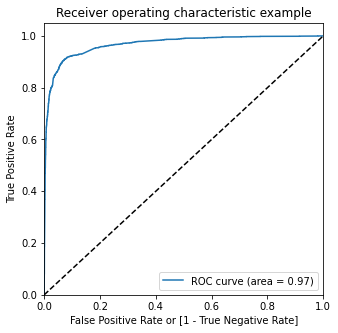

In [283]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

In [284]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.249549,7962,0,1,1,1,0,0,0,0,0,0,0
1,0,0.056101,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000454,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.988775,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.005312,9170,0,1,0,0,0,0,0,0,0,0,0


In [285]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.812618  0.971476  0.715406
0.2   0.2  0.895323  0.929723  0.874273
0.3   0.3  0.916039  0.918561  0.914495
0.4   0.4  0.922003  0.902026  0.934227
0.5   0.5  0.920904  0.877635  0.947382
0.6   0.6  0.919021  0.846631  0.963319
0.7   0.7  0.907250  0.794130  0.976474
0.8   0.8  0.896265  0.754857  0.982798
0.9   0.9  0.863779  0.654816  0.991652


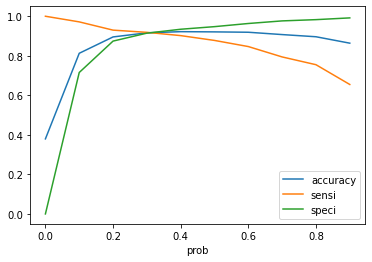

In [286]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [287]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.249549,7962,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.056101,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000454,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.988775,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.005312,9170,0,1,0,0,0,0,0,0,0,0,0,0


#### Assigning Lead Score

In [288]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.249549,7962,0,1,1,1,0,0,0,0,0,0,0,0,25
1,0,0.056101,5520,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.000454,1962,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.988775,1566,1,1,1,1,1,1,1,1,1,1,1,1,99
4,0,0.005312,9170,0,1,0,0,0,0,0,0,0,0,0,0,1


In [289]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [290]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9185613890037205

In [291]:
# Let us calculate specificity
TN / float(TN+FP)

0.9144953200101189

In [292]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08550467998988111


In [293]:
# Positive predictive value 
print (TP / float(TP+FP))

0.86796875


In [294]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9483210912906611


### Precision and Recall

In [295]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3745,  208],
       [ 296, 2123]], dtype=int64)

In [296]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9107679107679107

In [297]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8776353865233567

In [298]:
from sklearn.metrics import precision_score, recall_score

In [299]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9107679107679107

In [300]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8776353865233567

#### Precision and recall tradeoff

In [301]:
from sklearn.metrics import precision_recall_curve

In [302]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [303]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

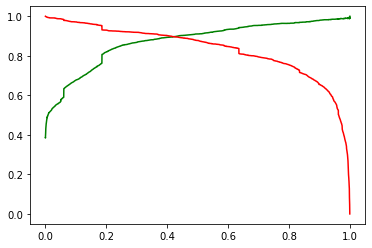

In [304]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [305]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0,0.3,0.570794,0.250000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5520,0,0,0.7,0.026631,1.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.5,0.075011,0.416667,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1566,0,0,1.0,0.550821,0.583333,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3504,0,0.186620,0.500000,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4050,0,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
7201,1,0.313380,0.333333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1196,0,0.186180,0.666667,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8219,0,0.108715,0.291667,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [307]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
#Making predictions on the test set

In [308]:
y_test_pred = res.predict(X_test_sm)

In [309]:
y_test_pred[:10]

3504    0.001592
4050    0.994921
7201    0.430596
1196    0.001294
8219    0.984977
8747    0.185776
9048    0.457293
6524    0.001368
7693    0.011843
8187    0.049665
dtype: float64

In [310]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [311]:
# Let's see the head
y_pred_1.head()

,0
3504,0.001592
4050,0.994921
7201,0.430596
1196,0.001294
8219,0.984977


In [312]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [313]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [314]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [315]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [316]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.001592
1,1,4050,0.994921
2,0,7201,0.430596
3,0,1196,0.001294
4,1,8219,0.984977


In [317]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [318]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis='columns')


In [319]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3504,0,0.001592
1,4050,1,0.994921
2,7201,0,0.430596
3,1196,0,0.001294
4,8219,1,0.984977


In [320]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [321]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3504,0,0.001592,0
1,4050,1,0.994921,1
2,7201,0,0.430596,1
3,1196,0,0.001294,0
4,8219,1,0.984977,1


In [322]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9165140974002197

In [323]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1549,  140],
       [  88,  954]], dtype=int64)

In [324]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [325]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9155470249520153

In [326]:
# Let us calculate specificity
TN / float(TN+FP)

0.9171107164002368